<a href="https://colab.research.google.com/github/nlajunior/quarentenadados/blob/master/Notebook_aula1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Aula 1

#### Importando a base de dados movies.csv

In [0]:
!pip install pandas

In [0]:
import pandas as pd

In [0]:
filmes=pd.read_csv('https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/movies.csv')

In [0]:
filmes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [0]:
filmes.columns=['filmeId', 'titulo', 'generos']

### Renomeando as colunas do dataset

In [0]:
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


#### Acessando a documentação da variável

In [0]:
?filmes

### Importando a base de dados raitings

In [0]:
avaliacoes = pd.read_csv('https://github.com/alura-cursos/introducao-a-data-science/blob/master/aula0/ml-latest-small/ratings.csv?raw=true')

In [0]:
avaliacoes.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [0]:
avaliacoes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [0]:
avaliacoes.columns=['usuarioId', 'filmeId', 'nota', 'momento']

In [0]:
avaliacoes.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


### Consultando as notas do filme com ID 1

In [0]:
avaliacoes.query('filmeId==1')

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1434,15,1,2.5,1510577970
1667,17,1,4.5,1305696483
...,...,...,...,...
97364,606,1,2.5,1349082950
98479,607,1,4.0,964744033
98666,608,1,2.5,1117408267
99497,609,1,3.0,847221025


### Calculando a média do filme com ID 1

In [0]:
avaliacoes.query('filmeId==1')['nota'].mean()

3.9209302325581397

### Agrupando por filme e calculando as médias

In [0]:
notas_medias_por_filme=avaliacoes.groupby('filmeId')['nota'].mean()
notas_medias_por_filme.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

### Juntando um dataframe com uma series

In [0]:
filmes_com_media=filmes.join(notas_medias_por_filme, on='filmeId')
filmes_com_media.head()

,filmeId,titulo,generos,nota
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


### Ordenando as médias (coluna nota) em ordem decrescente

In [0]:
filmes_com_media.sort_values('nota', ascending=False)

,filmeId,titulo,generos,nota
7656,88448,Paper Birds (Pájaros de papel) (2010),Comedy|Drama,5.0
8107,100556,"Act of Killing, The (2012)",Documentary,5.0
9083,143031,Jump In! (2007),Comedy|Drama|Romance,5.0
9094,143511,Human (2015),Documentary,5.0
9096,143559,L.A. Slasher (2015),Comedy|Crime|Fantasy,5.0
...,...,...,...,...
5749,30892,In the Realms of the Unreal (2004),Animation|Documentary,NaN
5824,32160,Twentieth Century (1934),Comedy,NaN
5837,32371,Call Northside 777 (1948),Crime|Drama|Film-Noir,NaN
5957,34482,"Browning Version, The (1951)",Drama,NaN


### Plotando o histograma de um determinado filme

In [0]:
import matplotlib.pyplot as plt

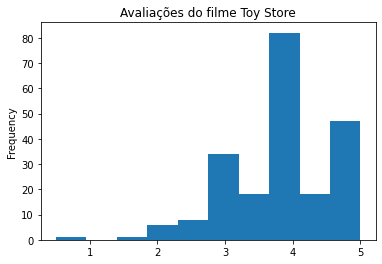

In [0]:
avaliacoes.query('filmeId==1')['nota'].plot(kind='hist', 
                                            title='Avaliações do filme Toy Store')
plt.show()

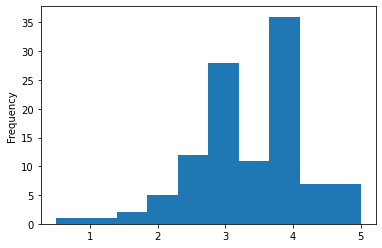

In [0]:
avaliacoes.query('filmeId==2')['nota'].plot(kind='hist')

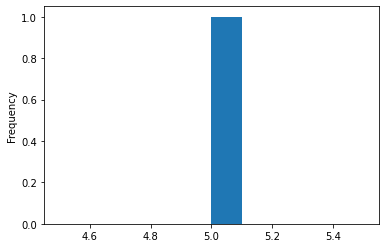

In [0]:
avaliacoes.query('filmeId==102084')['nota'].plot(kind='hist')

### Desafio 1 - Determine quantos filmes não tem avaliações e quais são esses filmes.



In [0]:
filmes_com_media.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   filmeId  9742 non-null   int64  
 1   titulo   9742 non-null   object 
 2   generos  9742 non-null   object 
 3   nota     9724 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 304.6+ KB


In [0]:
numero_de_filmes_sem_avaliacoes= filmes_com_media.shape[0]-filmes_com_media.dropna(subset=['nota']).shape[0]
print(f'Filmes sem avaliações: {numero_de_filmes_sem_avaliacoes}')

Filmes sem avaliações: 18


### Desafio 2 - Mudar o nome da coluna nota do dataframe filmes_com_media para nota_média após o join.



In [0]:
filmes_com_media.rename(columns={'nota':'media'}, inplace=True)
filmes_com_media.head()

,filmeId,titulo,generos,media
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


### Desafio 3

In [0]:
total_votos_por_filme= avaliacoes.groupby('filmeId')['nota'].count()
total_votos_por_filme

filmeId
1         215
2         110
3          52
4           7
5          49
         ... 
193581      1
193583      1
193585      1
193587      1
193609      1
Name: nota, Length: 9724, dtype: int64

In [0]:
filmes_com_media_e_votos = filmes_com_media.join(total_votos_por_filme, on='filmeId')
filmes_com_media_e_votos.head()


,filmeId,titulo,generos,media,nota
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930,215.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818,110.0
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615,52.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143,7.0
4,5,Father of the Bride Part II (1995),Comedy,3.071429,49.0


In [0]:
filmes_com_media_e_votos = filmes_com_media_e_votos.rename(columns={'nota': 'total_de_votos'})
filmes_com_media_e_votos.head()

,filmeId,titulo,generos,media,total_de_votos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930,215.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818,110.0
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615,52.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143,7.0
4,5,Father of the Bride Part II (1995),Comedy,3.071429,49.0


### Desafio 4

In [0]:
filmes_com_media.round(2)

,filmeId,titulo,generos,media
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.43
2,3,Grumpier Old Men (1995),Comedy|Romance,3.26
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.36
4,5,Father of the Bride Part II (1995),Comedy,3.07
...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,4.00
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,3.50
9739,193585,Flint (2017),Drama,3.50
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,3.50


### Desafio 5 Descobrir os generos dos filmes (quais são eles, únicos)

In [0]:
generos= filmes['generos'].str.get_dummies('|')
lista_de_generos= generos.columns.to_list()

In [0]:
lista_de_generos

['(no genres listed)',
 'Action',
 'Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'IMAX',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western']

### Desafio 6 

In [0]:
total_de_filmes_por_genero= filmes_com_media_e_votos.generos.str.get_dummies('|').sum()
total_de_filmes_por_genero

(no genres listed)      34
Action                1828
Adventure             1263
Animation              611
Children               664
Comedy                3756
Crime                 1199
Documentary            440
Drama                 4361
Fantasy                779
Film-Noir               87
Horror                 978
IMAX                   158
Musical                334
Mystery                573
Romance               1596
Sci-Fi                 980
Thriller              1894
War                    382
Western                167
dtype: int64

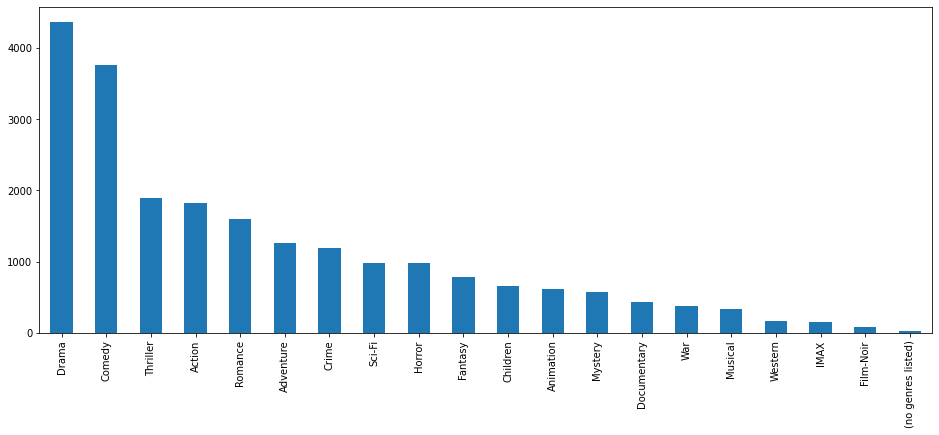

In [0]:
total_de_filmes_por_genero.sort_values(ascending=False).plot(kind='bar', figsize=(16,6))
plt.show()

## Aula 2

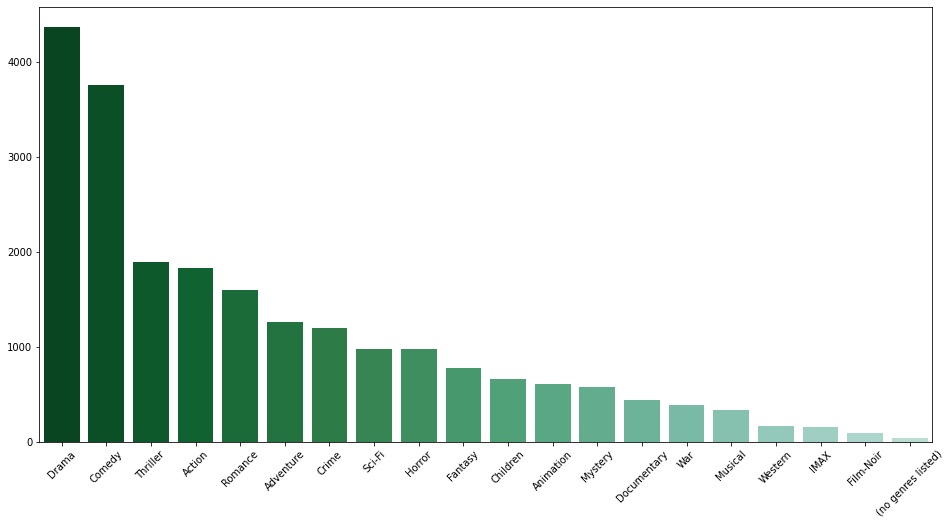

In [0]:
import seaborn as sns
filmes_por_genero= filmes['generos'].str.get_dummies('|').sum().sort_values(ascending=False)

plt.figure(figsize=(16,8))
sns.barplot(x=filmes_por_genero.index, 
            y=filmes_por_genero.values,
          palette=sns.color_palette('BuGn_r', n_colors=len(filmes_por_genero)+8))
plt.xticks(
    rotation=45)
plt.show()

In [0]:
notas_filmes_1= avaliacoes.query('filmeId==1')['nota']
media_filme_1=notas_filmes_1.mean()
print(media_filme_1)

3.9209302325581397


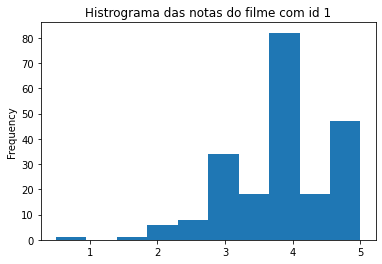

In [0]:
notas_filmes_1.plot(kind='hist',
                    title='Histrograma das notas do filme com id 1')
plt.show()

In [0]:
notas_filmes_2= avaliacoes.query('filmeId==2')['nota']
media_filme_2=notas_filmes_2.mean()
print(f'Média do filme: {media_filme_2}')

Média do filme: 3.4318181818181817


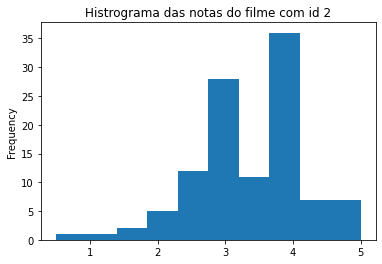

In [0]:
notas_filmes_2.plot(kind='hist',
                    title='Histrograma das notas do filme com id 2')
plt.show()

In [0]:
filmes_com_media.head()

,filmeId,titulo,generos,media
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


In [0]:
filmes_com_media.sort_values('media', ascending=False)[2450:2500]

,filmeId,titulo,generos,media
745,973,Meet John Doe (1941),Comedy|Drama,3.900000
6632,56251,Futurama: Bender's Big Score (2007),Animation|Comedy|Sci-Fi,3.900000
101,116,Anne Frank Remembered (1995),Documentary,3.900000
5719,27846,"Corporation, The (2003)",Documentary,3.900000
802,1050,Looking for Richard (1996),Documentary|Drama,3.900000
3983,5617,Secretary (2002),Comedy|Drama|Romance,3.900000
1323,1785,King of New York (1990),Crime|Thriller,3.900000
7103,70599,"Time Traveler's Wife, The (2009)",Drama|Romance|Sci-Fi,3.900000
5248,8607,Tokyo Godfathers (2003),Adventure|Animation|Drama,3.900000
4677,6985,"Passion of Joan of Arc, The (Passion de Jeanne...",Drama,3.900000


### Plotando um gráfico através de uma função

In [0]:
def plota_grafico(n):
  notas_do_filme= avaliacoes.query(f'filmeId=={n}')['nota']
  notas_do_filme.plot(kind='hist',
                    title='Histrograma das notas do filme')
  plt.show()
  
  notas_do_filme.plot.box()
  plt.show()
  return notas_do_filme.describe()



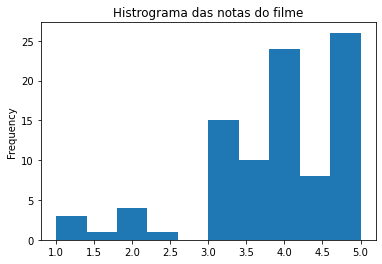

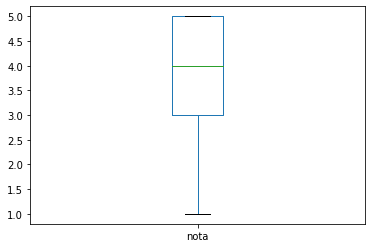

count    92.000000
mean      3.880435
std       1.025418
min       1.000000
25%       3.000000
50%       4.000000
75%       5.000000
max       5.000000
Name: nota, dtype: float64

In [0]:
plota_grafico(919)

AttributeError: ignored

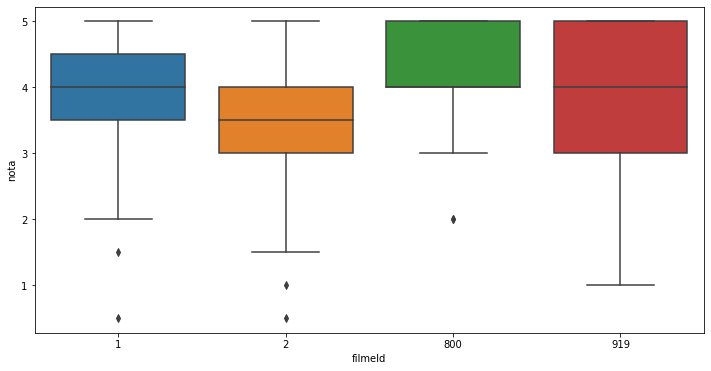